# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated.

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [1]:
import pandas as pd
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [4]:
df_opinion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  341 non-null    object 
 1   WEATHER_CODE_EVENING  341 non-null    int64  
 2   TOTAL_SNOW_MM         341 non-null    int64  
 3   UV_INDEX              341 non-null    int64  
 4   SUNHOUR               341 non-null    float64
 5   OPINION               341 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 16.1+ KB


In [10]:
import pandas as pd

def merge_and_fill(DataFrameMain, DataFrameOpinion):
  # MERGE
  NewDataFrame = pd.merge(DataFrameMain, DataFrameOpinion, how='left',left_on ='DATE',right_on='date')

  # FILL IN MISSING VALUES
  NewDataFrame['OPINION'].fillna('Very Bad', inplace=True)

  # ADD NEW COLUMNS
  NewDataFrame['flag'] = NewDataFrame['OPINION'].apply(lambda x: 1 if x == 'Very Good' else 0 if x == 'Very Bad' else 2)
  NewDataFrame['MONTH'] = pd.to_datetime(NewDataFrame['date']).dt.month
  NewDataFrame['DAY'] = pd.to_datetime(NewDataFrame['date']).dt.day

  # TRANSLATE OPINION
  translation = {'Very Good': 'Très Bon', 'Good': 'Bon', 'Medium': 'Moyen', 'Bad': 'Mauvais', 'Very Bad': 'Très Mauvais'}
  NewDataFrame['OPINION'] = NewDataFrame['OPINION'].map(translation)
  NewDataFrame = NewDataFrame.drop(columns=['date'])
  return NewDataFrame



NewDataFrame = merge_and_fill(df_main, df_opinion)
print(NewDataFrame.head())


         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                  8.9                    79            

<ipython-input-10-77c4a6b5c8b7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NewDataFrame['OPINION'].fillna('Very Bad', inplace=True)


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [19]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

liste_donnees = []
for annee in range(2010, 2019):
  annee_csv = str(annee)
  url_main = f"https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_" + annee_csv + ".csv"
  url_opinion = f"https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_" + annee_csv + ".csv"

  main = pd.read_csv(url_main)
  opinion = pd.read_csv(url_opinion)
  opinion['date'] = pd.to_datetime(opinion['date'])
  main['DATE'] = pd.to_datetime(main['DATE'])
  donnees_annee = merge_and_fill(main, opinion)
  liste_donnees.append(donnees_annee)

big_DataFrame = pd.concat(liste_donnees, ignore_index=True)

print(big_DataFrame)

<ipython-input-10-77c4a6b5c8b7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NewDataFrame['OPINION'].fillna('Very Bad', inplace=True)
<ipython-input-10-77c4a6b5c8b7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

           DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0    2010-01-01                  5                  2                 19   
1    2010-01-02                  5                 -1                  6   
2    2010-01-03                  5                  1                 26   
3    2010-01-04                  1                 -4                 25   
4    2010-01-05                  2                 -5                 20   
...         ...                ...                ...                ...   
3282 2018-12-27                  7                  2                  6   
3283 2018-12-28                  7                  2                  8   
3284 2018-12-29                  7                  1                  6   
3285 2018-12-30                  9                  4                  6   
3286 2018-12-31                  9                  5                 10   

      TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0            

<ipython-input-10-77c4a6b5c8b7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NewDataFrame['OPINION'].fillna('Very Bad', inplace=True)


## Add 2019 to 2022

In [25]:
# Each year since 2019 (included) has 1 source : weatherYYYY.csv
# Chaque année depuis 2019 (inclus) a une seule source avec ce format de nom de fichier : weatherYYYY.csv
link2019 = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv")

# test print(link2019.isnull().sum())



In [29]:

for year in range(2019, 2023):
  year_csv = str(year)
  weather  = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather" + year_csv + ".csv"

  df_main = pd.read_csv(weather)

  df_main['DATE'] = pd.to_datetime(df_main['DATE'])

  # FILL IN MISSING VALUES
  df_main['OPINION'] = df_main['OPINION'].fillna("unknown")

  df_main['SUNHOUR'] = df_main['SUNHOUR'].ffill()

  median_uv_column = df_main['UV_INDEX'].median()
  df_main['UV_INDEX'] = df_main['UV_INDEX'].fillna(median_uv_column)

  mean_snow_column = df_main['TOTAL_SNOW_MM'].mean()
  df_main['TOTAL_SNOW_MM'] = df_main['TOTAL_SNOW_MM'].fillna(mean_snow_column)

  mean_weather_column = df_main['WEATHER_CODE_EVENING'].mean()
  df_main['WEATHER_CODE_EVENING'] = df_main['WEATHER_CODE_EVENING'].fillna(mean_weather_column)


  # TRANSLATE OPINION
  traduction={
     'very bad' : 'vraiment mauvais',
      'bad' :'mauvais',
      'not good not bad' : 'pas bon pas mauvais',
      'good' :'bon',
     'very good' : 'vraiment bon',
      'unknown' : "Pas d'opinion"
  }
  df_main['OPINION'] = df_main['OPINION'].map(traduction)

  all_df.append(df_main)

big_df = pd.concat(all_df, ignore_index=True)

print(big_df)

           DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0    2010-01-01                  5                  2                 19   
1    2010-01-02                  5                 -1                  6   
2    2010-01-03                  5                  1                 26   
3    2010-01-04                  1                 -4                 25   
4    2010-01-05                  2                 -5                 20   
...         ...                ...                ...                ...   
6204 2022-12-27                 10                  3                 19   
6205 2022-12-28                 12                  7                 35   
6206 2022-12-29                 12                  8                 18   
6207 2022-12-30                 15                  7                 47   
6208 2022-12-31                 17                 14                 32   

      TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0            

# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 13 seasonality for the 13 summers/winters alternance.




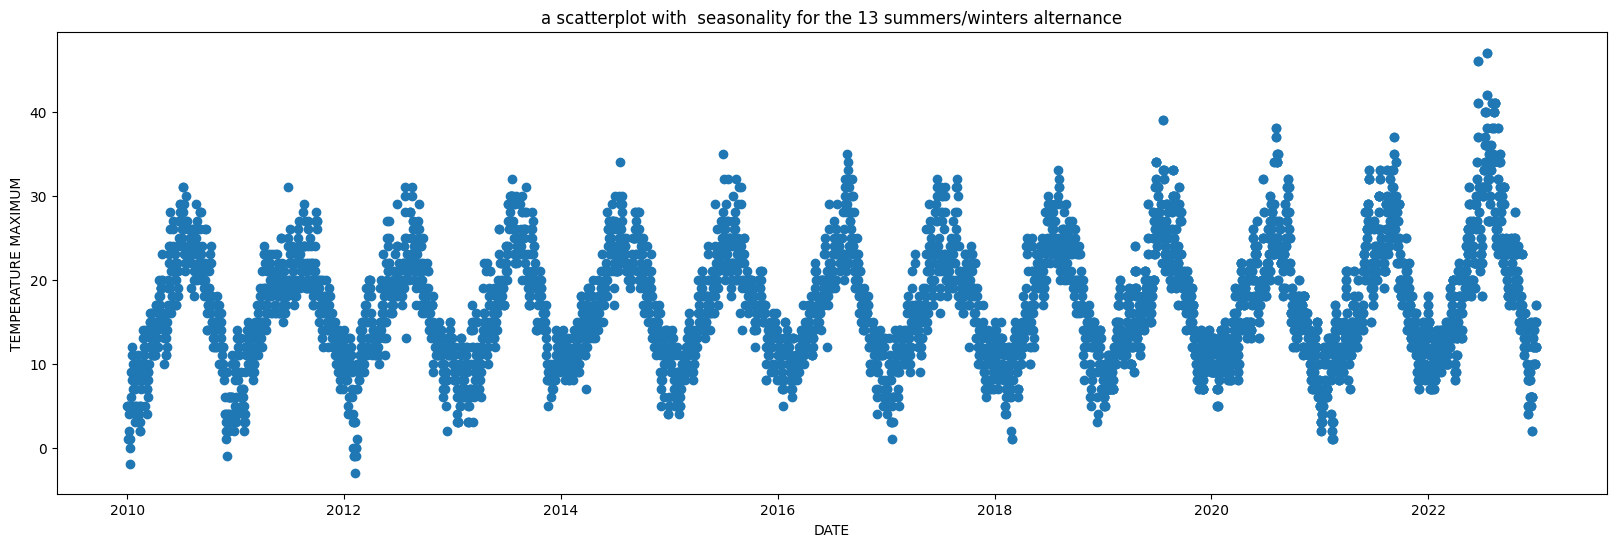

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.scatter(data = big_df,
            x='DATE',
            y='MAX_TEMPERATURE_C')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE MAXIMUM')
plt.title('a scatterplot with  seasonality for the 13 summers/winters alternance')

plt.show()


Find appropriate dataviz to answer to this question :

Which year had the best weather? Are years very different or not ?


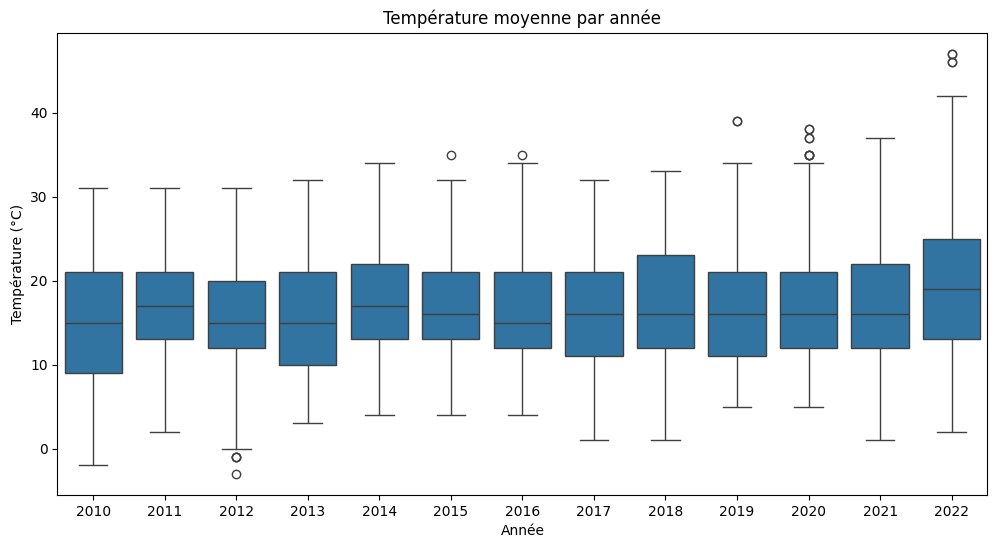

 cool weather but 2018 and 2022 was a bit warmer ... and 2018 to 2021 got almost the same median


In [37]:
import seaborn as sns

#recupère juste l'année sans le format date qui nous géner
#big_df['DATE']
# Output : 2010-01-01, 2010-01-02,..., 2022-12-31

#big_df['YEAR'] = big_df['DATE'].dt.year
# Output : 2010, 2010,..., 2022
big_df['YEAR'] = big_df['DATE'].dt.year

plt.figure(figsize=(12, 6))

sns.boxplot(x='YEAR', y='MAX_TEMPERATURE_C', data=big_df)


plt.title('Température moyenne par année')
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.show()
print(" cool weather but 2018 and 2022 was a bit warmer ... and 2018 to 2021 got almost the same median")